# Predicting heart disease using machine learning

this notebook looks into using various Python-based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting whether
or not someone has heart disease based on their medical attributes.

We're going to following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCL machine learning repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease
during the proof of concept, we'll pursue the project.

## 4. Features

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.


## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.


In [3]:
# Import all the tools we need

# Regular EDA(exploratry data analaysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [14]:
df = pd.read_csv("data/heart.csv")
df.shape

(1025, 14)

## Data Exploration (exploraty data analysis or EDA)

The goal here is to find out more about the data and become a subject
matter expert on the dataset you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why you should are about them

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [17]:
# Let's find out how many of each class there
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

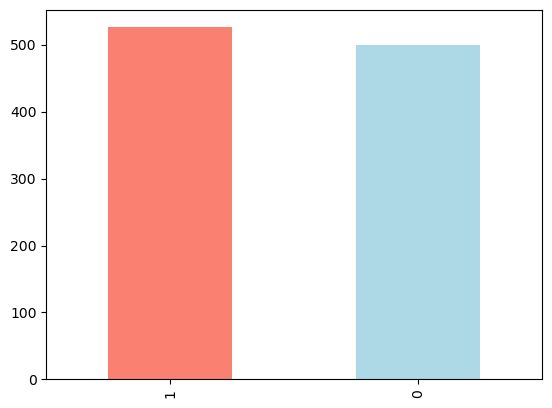

In [21]:
plt.figure(figsize=(12, 8))
fig = df["target"].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"]);
fig.set_title("Heart Disease")
fig.set_xlabel("1: Yes 0: No")




In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()